# Reflecting on the evolution of board games

### by Amitaditya Paul and Xinmeng Liu

## Introduction

The history and evolution of board games is quite fascinating, since they have always been an important part of human culture and tradition. Seamedu (2019) asserts that while prehistoric games used dice or pieces that were made by carving stone or wood, with time, we started creating more evolved games. 
This research project aims to visualise the trend in the types of board games invented over time. Our research question is: How have board games evolved over time? We will also consider important worldwide events in time and see if or how board games genres were affected during those times.

The data used in this project is taken from [Kaggle](https://www.kaggle.com/datasets/mrpantherson/board-game-data).

<img src=https://public-media.interaction-design.org/images/uploads/b43f95e2ca4bb53be1eb62a8cadeb4e7.jpg
     alt="Cave painting"
     style="height: 400px; width:500px;"/>

*&copy;WolfgangRieger, Fair Use*

Dice games have been with mankind for a very long time, as you can see from this cave painitng. Let the above image serve as our motivation towards this project.

## Visualisation

> Pie charts and Bar graph are interactive!

### Category

In [167]:
pip install pyecharts

Note: you may need to restart the kernel to use updated packages.


In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyecharts.charts import Bar,Pie
from pyecharts.faker import Faker
from pyecharts import options as opts

from pyecharts.charts import PictorialBar
from pyecharts.globals import SymbolType
from pyecharts.charts import Bar

from pyecharts.globals import ThemeType

Let's have a look at the data given in ascending order of year.

In [169]:
board_game = pd.read_csv("bgg_db_2018_01.csv", encoding="latin")
board_game.head()
bg_year_ascend = board_game.sort_values("year")
bg_year_ascend.head()

,rank,bgg_url,game_id,names,min_players,max_players,avg_time,min_time,max_time,year,avg_rating,geek_rating,num_votes,image_url,age,mechanic,owned,category,designer,weight
1082,1082,https://boardgamegeek.com/boardgame/2397/backg...,2397,Backgammon,2,2,30,30,30,-3000,6.52509,6.36990,9432,https://cf.geekdo-images.com/images/pic55221.jpg,8,"Betting/Wagering, Roll / Spin and Move",13676,"Abstract Strategy, Dice",(Uncredited),2.0263
112,113,https://boardgamegeek.com/boardgame/188/go,188,Go,2,2,180,30,180,-2200,7.66016,7.39267,12188,https://cf.geekdo-images.com/images/pic1728832...,8,Area Enclosure,16369,Abstract Strategy,(Uncredited),3.9759
3639,3640,https://boardgamegeek.com/boardgame/5985/misce...,5985,Miscellaneous Game Accessory,0,0,0,0,0,0,6.93448,5.73270,212,https://cf.geekdo-images.com/images/pic1017967...,0,none,1056,none,(Uncredited),3.3333
3354,3355,https://boardgamegeek.com/boardgame/130006/min...,130006,Mini Kubb,2,12,15,15,15,0,7.45163,5.76594,166,https://cf.geekdo-images.com/images/pic1413126...,3,none,367,Action / Dexterity,none,1.2222
3086,3087,https://boardgamegeek.com/boardgame/108018/rii...,108018,Riichi Mahjong,4,4,120,60,120,0,8.38658,5.80026,149,https://cf.geekdo-images.com/images/pic1217879...,8,"Betting/Wagering, Hand Management, Set Collection",196,Abstract Strategy,(Uncredited),2.8333


First, we want to create a plot of the categories on year, so we only need the "year" and "category" variables from the dataset for now. Let's see what the data looks like.

In [170]:
bg_year_cat = bg_year_ascend[["year", "category"]]
bg_year_cat.head()

,year,category
1082,-3000,"Abstract Strategy, Dice"
112,-2200,Abstract Strategy
3639,0,none
3354,0,Action / Dexterity
3086,0,Abstract Strategy


Right off the bat, we can already see that Abstract Strategy genre of board games were some of the first ones made. We'll see this again in the line graphs and pie chart.

In [171]:
df_1=board_game[["year","category"]]
df_1["category"]+=","
df_2=df_1.groupby("year").sum()

/tmp/ipykernel_424/254010382.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["category"]+=","


In [172]:
def f(x):
    return x[:-1]
df_3=df_2.category.apply(f)

In [173]:
df_3
key_1=[]
values_1=[]
for i in df_3.index:
    key_1.append(i)
for k in df_3:
    values_1.append(k.split(","))
dict1 = dict(zip(key_1, values_1))

In [174]:
df_4=pd.DataFrame.from_dict(data=dict1,orient='index')
df_5=pd.DataFrame()
for o in df_4.index:
    df_6=df_4.loc[o].value_counts().sort_index()
    df_5=pd.concat([df_5,df_6],axis=1).fillna(0)
df_5

,-3000,-2200,0,400,550,700,762,1000,1425,1430,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Dice,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,6.0,11.0,15.0,14.0,17.0,29.0,20.0,21.0,2.0
Abstract Strategy,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,5.0,10.0,8.0,16.0,16.0,9.0,14.0,18.0,16.0,0.0
Game System,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,7.0,0.0
Party Game,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.0,10.0,15.0,18.0,21.0,17.0,19.0,24.0,14.0,0.0
Real-time,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,4.0,5.0,11.0,11.0,8.0,14.0,15.0,22.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Medical,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,3.0,4.0,2.0,6.0,0.0
Math,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zombies,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Religious,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Here's the frequency of each category in every year. Again, notice the prevalence of Abstract Strategy games in the early eras. We'll get back to that real soon.

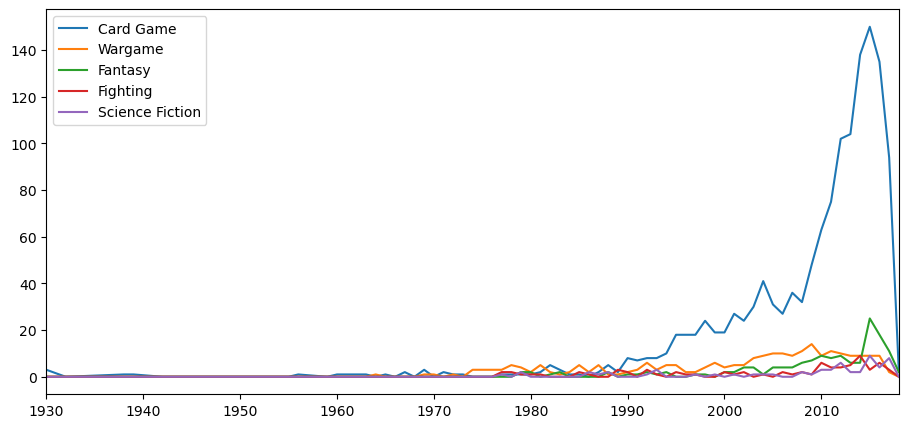

In [175]:
df_6=df_5.T
df_6["Card Game"]=df_6["Card Game"]+df_6[" Card Game"]
del df_6[" Card Game"]
df_6.sum().sort_values(ascending=False)
df_6[["Card Game","Wargame","Fantasy","Fighting","Science Fiction"]].plot(figsize=(11, 5))
plt.xlim(1930,2018);

> Top five categories from 3000 B.C. to 2018. Note that timeline in plot is from 1930 to 2018 only. Think of this as the 'overall' line graph but for post-1930. Plotting for the entire time period from 3000 B.C. to 2018 cannot be visualised properly and was a limitation to this project. Thus, different line graphs shown to break this down.

Looking above, it seems like card games have been quite popular. We'll soon explain why.

In [176]:
df_6.to_excel(excel_writer="ceshi.xlsx")

<Figure size 1280x960 with 0 Axes>

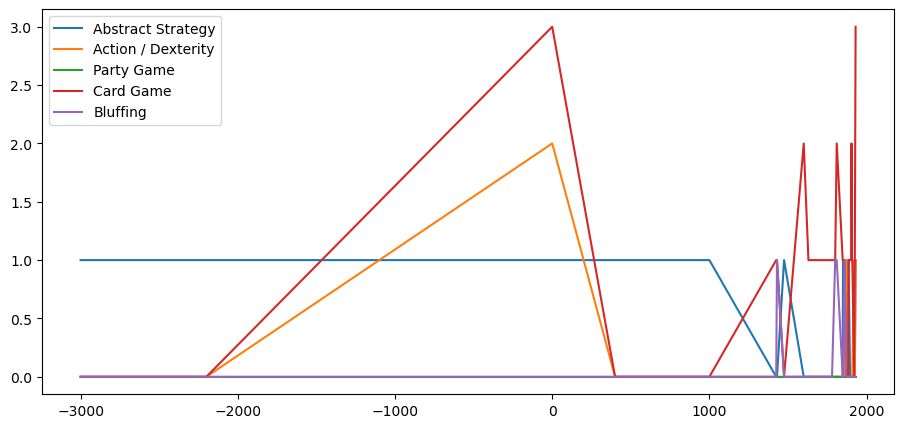

In [177]:
df_9=df_6.loc[-3000:1930]
plt.figure(dpi=200);
df_9[["Abstract Strategy","Action / Dexterity","Party Game","Card Game","Bluffing"]].fillna(0).plot(figsize=(11, 5));

> Top 5 categories for 3000 B.C. to 1930.

Seems like the Abstract Strategy genre remains popular during that time period.

<Figure size 1280x960 with 0 Axes>

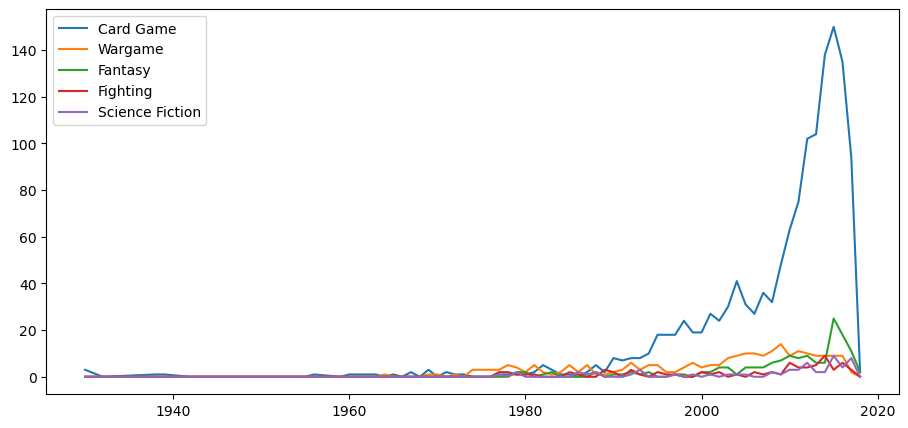

In [185]:
df_10=df_6.loc[1930:2018]
plt.figure(dpi=200);
df_10[["Card Game","Wargame","Fantasy","Fighting","Science Fiction"]].fillna(0).plot(figsize=(11, 5));

> Top 5 categories for 1930 to 2018.

In [179]:
df_7=df_6.loc[-3000:1930].sum().sort_values(ascending=False).head(5)
name=list(df_7.index)
v=list(df_7)
(
    Pie(init_opts=opts.InitOpts(width='800px',height='500px'))
    # .add(series_name='', data_pair=[(j, i) for i, j in zip(num, lab)])#Pie chart
    .add(series_name='',data_pair=[(j,i) for i,j in zip(v,name)])
).set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {d}%")).set_global_opts(title_opts=opts.TitleOpts(title="3000 B.C to 1930",pos_left='40%',pos_top="95%")).render_notebook()

> *Note: The pie charts are made according to the last date of the specified time period. For example, in the 3000 B.C. to 1930 time period, data taken in this time period are used to create
the pie chart as at 1930.*

The above pie chart was made using data of the top five (board game) genres in the 3000 B.C. to 1930 time period.

From the above pie chart, we can see that Abstract Strategy games make up the largest portion at 39.4%. This is followed by Action/Dexterity, Party Game, Card Game, and Bluffing, respectively. Given the technology available in the Ancient, classical, and Renaissance eras, it's not surprising that Abstract Strategy games are more popular. For example, you can see that Backgammon and Mahjong were some of the first board games ever made.  

In [180]:
df_8=df_6.loc[1931:2018].sum().sort_values(ascending=False).head(5)
name_1=list(df_8.index)
v_1=list(df_8)
(
    Pie(init_opts=opts.InitOpts(width='800px',height='500px'))
    # .add(series_name='', data_pair=[(j, i) for i, j in zip(num, lab)])#Piechart
    .add(series_name='',data_pair=[(j,i) for i,j in zip(v_1,name_1)])
).set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {d}%")).set_global_opts(title_opts=opts.TitleOpts(title="1930 to 2018",pos_left='40%',pos_top="95%")).render_notebook()

However, in the post-1930 period, the top genres of board games have changed. The top genres are now, in descending order of percentage shares, Card Games, Wargame, Fantasy, Fighting, Science Fiction, respectively. This is nothing like the pre-1930 time period. Crespi (1956) explains that the primary reason why card games became so popular in the 20th century is that group players feel that card playing is a congenial and entertaining way of being in groups due to the interactive "atmosphere" of the game situation and acts as substitute for conversation. Humans are social animals and hence, seek ways to increase interactions with one another. What better way to do so by sitting around a table playing card games?

The Wargame genre takes the second largest share at 20.46%. Unsurprisingly, it became popular after 1930. Why? Well, Mantello (2017) explains that as a cultural text and procedural metaphor, the Wargame genre allowed individuals to come to terms with the reality of a war (most notably, World War 1 and World War 2) without spatial or temporal boundaries as well as the moral and ethical ambiguities of covert war. In the same manner, the hyperrealist first-person shooter video games and Wargame genre permitted players to leverage the chaos and unpredictability of an active war and battlefield. 
As Luckham (1984) writes: "Like other ideologies, it (armament culture) can be viewed as a series of interpellations, or appeals to individuals or social groups to identify themselves as subjects or conscious participants in social roles with inclusive symbols of identity and authority."

Unsurprisingly, the Science Fiction genre can now be seen as one of the top genres in board games in the post-1930 period. Paura and Colăcel (2019) brilliantly summarizes how Science Fiction became popular in an ever-technologically driven world. The great achievement of Science Fiction has been its ability to anticipate how audiences are prone to interpret the promises of technological progress. Its appeal lies in the possibility of foreshadowing the long-term consequences of technological knowledge and social developments (rather than in being 'accurately predictive'). Such anticipation of technological evolution is captured in the evolution of board games.

### Average Play Time

Let's have a look at how the average time taken to complete a board game changes over time. 

> Limitation: Since there are too many observations, we are only considering the post-1900 time period. Furthermore, we are choosing one observation for every '4' years. Also, note that after 1900, some observations aren't given every 4 years (in the source data).

In [181]:
data__1 = board_game[(board_game.year > 1900)]
data__2= data__1.groupby('year')['avg_time'].mean()
data__2

year
1903     90.000000
1904     37.500000
1906     45.000000
1909     30.000000
1921     10.000000
           ...    
2014     84.316239
2015     97.228235
2016     90.307882
2017     82.130990
2018    104.000000
Name: avg_time, Length: 76, dtype: float64

Hmm, we can't tell for sure by looking at the first five and last five board games. 

In [182]:
data__2 = list(data__2)
df__year = data__1['year']
df__year = df__year.sort_values(ascending=True)
df__year = list(df__year)

df__year
df__year1 = []
for i in df__year:
    if i not in df__year1:
        df__year1.append(i)

In [183]:
len(df__year1)

76

76 is the total number of observations we're considering.

In [184]:
df_Year=[1925, 1930, 1942,1951, 1955, 1962,1966, 1970,1974,1978, 1982, 1986,1990, 1994, 1998, 2002, 2006, 2010, 2014,  2018]
df_N =[90.0, 30.0,60.0, 58.57,120.0, 97.5,273.8, 254.4,105.88, 162.19,116.33, 161.94, 159.13,92.31, 88.29, 108.27, 88.53,  125.59, 82.13, 104.0]

bar = Bar().set_global_opts(
        title_opts=opts.TitleOpts(title="Time period (every 4 years)",pos_left='40%',pos_top="95%"))
bar.add_xaxis(df_Year) 
bar.add_yaxis('Time in minutes',df_N)
bar.set_colors(['lightblue'])
bar.render_notebook()

The bar graph shows that there is no noticeable nor abnormal behaviour in average time taken in minutes to complete a board game across time. Although there are two spikes in 1996 and 1970, further research shows no relation to any worldwide events at that time. This may have happened through other aspects that are not covered in this project. It seems like the average time taken fluctuates every time period, but, again, nothing out of the ordinary.

## Conclusion

There is a clear trend towards more 'advanced' board games through the passage of time. From Abstract Strategy games to Wargame and Science Fiction board games, there is clear indication of societal progression. Although we cannot determine the true effect of worldwide events on the genre of board games, we can be sure such a correlation exists. Furthermore, there seems to be no relation between social progress and the average time taken to complete a board game.

## References

  admin. “The History and Evolution of Popular Board Games.” *Seam*, 13 Nov. 2019, https://www.seamedu.com/blog/the-history-and-evolution-of-popular-board-games/. Accessed 28 Nov. 2022.


  Crespi, Irving. “The Social Significance of Card Playing as a Leisure Time Activity.” *American Sociological Review*, vol. 21, no. 6, Dec. 1956, p. 717, https://doi.org/10.2307/2088423.


  Luckham, Robin. “Armament Culture.” Alternatives: Global, Local, Political, vol. 10, no. 1, Jan. 1984, pp. 1–44, doi:10.1177/030437548401000102.


  Mantello, Peter. “Military Shooter Video Games and the Ontopolitics of Derivative Wars and Arms Culture.” American Journal of Economics and Sociology, vol. 76, no. 2, Mar. 2017, pp. 483–521, doi:10.1111/ajes.12184.


  Paura, Roberto, and Onoriu Colăcel. “Reading Reality Through Science Fiction.” Zenodo, 28 Aug. 2019, https://zenodo.org/record/3380311.
